<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:#146e10;'>
    <br/>
    PROJET 7<br/>
    <br/>
    "Effectuez une prédiction de revenus"
    <br/>
    <br/>
   <br/>
</h1>


Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
Représentez la courbe de Lorenz de chacun des pays choisis.
Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?


# [Misson 2](#m2)  
* [Diversité des distributions de revenus](#div)  
* [Représentez la courbe de Lorenz de chacun des pays choisis](#lorenz)  
* [Evolution des indices de Gini](#evol)  
* [Classement par indice de Gini](#classement)  



In [1]:
# Calculs & dataframes
import pandas as pd
import numpy as np
import matplotlib
# Librairies graphiques
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

from collections import Counter
import random



import scipy.stats as st
import pingouin as pg
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Chargement des données
df= pd.read_csv('nouveau df .csv')
display(df)

,country,country_code,population,quantile,income,gdpppp,Gini
0,Albania,ALB,2947314.0,1,728.89795,7297.00000,0.321410
1,Albania,ALB,2947314.0,2,916.66235,7297.00000,0.321410
2,Albania,ALB,2947314.0,3,1010.91600,7297.00000,0.321410
3,Albania,ALB,2947314.0,4,1086.90780,7297.00000,0.321410
4,Albania,ALB,2947314.0,5,1132.69970,7297.00000,0.321410
...,...,...,...,...,...,...,...
11595,Congo Democratic Republic of the,COD,60411195.0,96,810.62330,303.19305,0.459403
11596,Congo Democratic Republic of the,COD,60411195.0,97,911.78340,303.19305,0.459403
11597,Congo Democratic Republic of the,COD,60411195.0,98,1057.80740,303.19305,0.459403
11598,Congo Democratic Republic of the,COD,60411195.0,99,1286.60290,303.19305,0.459403


# Misson 2 <a id= 'm2' > </a> 
 <a id= 'div' > </a>  
<h2 style='color:#6b21eb'>Diversité des distributions de revenus</h2>


Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
Représentez la courbe de Lorenz de chacun des pays choisis.
Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [3]:
#Calcul du revenu moyen du pays dans lequel habite notre prospect
df_income_avg = df[['country_code','income']].groupby('country_code').mean().reset_index()
df_income_avg.rename(columns={'income':'income_avg'}, inplace=True)
df = df.merge(df_income_avg, how='left', on='country_code')
display(df.shape)
display(df.head()) 

(11600, 8)

,country,country_code,population,quantile,income,gdpppp,Gini,income_avg
0,Albania,ALB,2947314.0,1,728.89795,7297.0,0.32141,2994.829902
1,Albania,ALB,2947314.0,2,916.66235,7297.0,0.32141,2994.829902
2,Albania,ALB,2947314.0,3,1010.91600,7297.0,0.32141,2994.829902
3,Albania,ALB,2947314.0,4,1086.90780,7297.0,0.32141,2994.829902
4,Albania,ALB,2947314.0,5,1132.69970,7297.0,0.32141,2994.829902


In [4]:
# Description des données par pays
df_pays_Diver = df.groupby(by='country').mean()
df_pays_Diver.reset_index(inplace=True)
df_pays_Diver=df_pays_Diver.sort_values('income_avg')
df_pays_Diver= df_pays_Diver.sort_values('income_avg')
df_pays_Diver.head()

,country,population,quantile,income,gdpppp,Gini,income_avg
21,Congo Democratic Republic of the,60411195.0,50.5,276.016044,303.19305,0.459403,276.016044
65,Madagascar,19996476.0,50.5,345.237074,950.00000,0.455951,345.237074
23,Cote d'Ivoire,19605568.0,50.5,399.835204,1526.00000,0.430626,399.835204
55,Kenya,39791984.0,50.5,519.320032,1429.00000,0.315769,519.320032
99,Swaziland,1049948.0,50.5,530.283828,4748.00000,0.478735,530.283828


<div class="alert alert-info" role="alert">
<p><b>**sélectionner des pays**</b>
<p><b>On choisira  :</b></p>
<p>les pays avoir les revenus moyens les plus faibles et les plus forts ;</p>
<p>les pays avec les revenus moyens premier,médians et troisième quartile ;</p>
<p>la france .</p>

</div>

  



In [5]:
df_pays_Diver.describe()

,population,quantile,income,gdpppp,Gini,income_avg
count,1.160000e+02,116.0,116.000000,116.000000,116.000000,116.000000
mean,5.348157e+07,50.5,6069.121925,12436.144671,0.395017,6069.121925
std,1.684668e+08,0.0,6660.966925,13153.602326,0.088893,6660.966925
min,3.174140e+05,50.5,276.016044,303.193050,0.248249,276.016044
25%,4.698545e+06,50.5,1374.270126,2577.500000,0.327148,1374.270126
50%,1.381157e+07,50.5,3287.174692,7532.500000,0.377122,3287.174692
75%,3.986403e+07,50.5,7077.900152,17679.250000,0.451394,7077.900152
max,1.324655e+09,50.5,26888.511518,73127.000000,0.682949,26888.511518


In [6]:
# Pays avec les revenus moyens les plus faibles
df_pays_Diver[df_pays_Diver['income_avg'] < 277]

,country,population,quantile,income,gdpppp,Gini,income_avg
21,Congo Democratic Republic of the,60411195.0,50.5,276.016044,303.19305,0.459403,276.016044


In [7]:
# Pays avec les revenus moyens premier quartile
df_pays_Diver[(df_pays_Diver['income_avg'] > 1370) & (df_pays_Diver['income_avg'] < 1378)]

,country,population,quantile,income,gdpppp,Gini,income_avg
114,Viet Nam,86243424.0,50.5,1377.773966,2578.0,0.393546,1377.773966


In [8]:
# Pays avec les revenus moyens médians
df_pays_Diver[(df_pays_Diver['income_avg'] > 3277) & (df_pays_Diver['income_avg'] < 3296)]

,country,population,quantile,income,gdpppp,Gini,income_avg
85,Paraguay,6081296.0,50.5,3278.080965,4347.0,0.539729,3278.080965


In [9]:
# Pays avec les revenus moyens troisième quartile
df_pays_Diver[(df_pays_Diver['income_avg'] > 7051) & (df_pays_Diver['income_avg'] < 7105)]

,country,population,quantile,income,gdpppp,Gini,income_avg
18,Chile,16708255.0,50.5,7051.609966,13390.0,0.546115,7051.609966


In [10]:
# Pays avec les revenus moyens les plus forts
df_pays_Diver[df_pays_Diver['income_avg'] > 26888]

,country,population,quantile,income,gdpppp,Gini,income_avg
44,Iceland,317414.0,50.5,26888.511518,36527.0,0.302046,26888.511518


In [11]:
# La france
df_pays_Diver.loc[df_pays_Diver['country'] == 'France']

,country,population,quantile,income,gdpppp,Gini,income_avg
35,France,64374979.0,50.5,18309.407545,30357.0,0.34564,18309.407545


In [12]:
#create df with only selected countries
selected_countries = df_pays_Diver[(df_pays_Diver['country'] == 'France') |
                     (df_pays_Diver['country'] == 'Congo Democratic Republic of the') |
                     (df_pays_Diver['country'] == 'Viet Nam') |
                     (df_pays_Diver['country'] == 'Paraguay') |
                     (df_pays_Diver['country'] == 'Chile') |
                     (df_pays_Diver['country'] == 'Iceland')].sort_values('income_avg')

selected_countries

,country,population,quantile,income,gdpppp,Gini,income_avg
21,Congo Democratic Republic of the,60411195.0,50.5,276.016044,303.19305,0.459403,276.016044
114,Viet Nam,86243424.0,50.5,1377.773966,2578.00000,0.393546,1377.773966
85,Paraguay,6081296.0,50.5,3278.080965,4347.00000,0.539729,3278.080965
18,Chile,16708255.0,50.5,7051.609966,13390.00000,0.546115,7051.609966
35,France,64374979.0,50.5,18309.407545,30357.00000,0.345640,18309.407545
44,Iceland,317414.0,50.5,26888.511518,36527.00000,0.302046,26888.511518


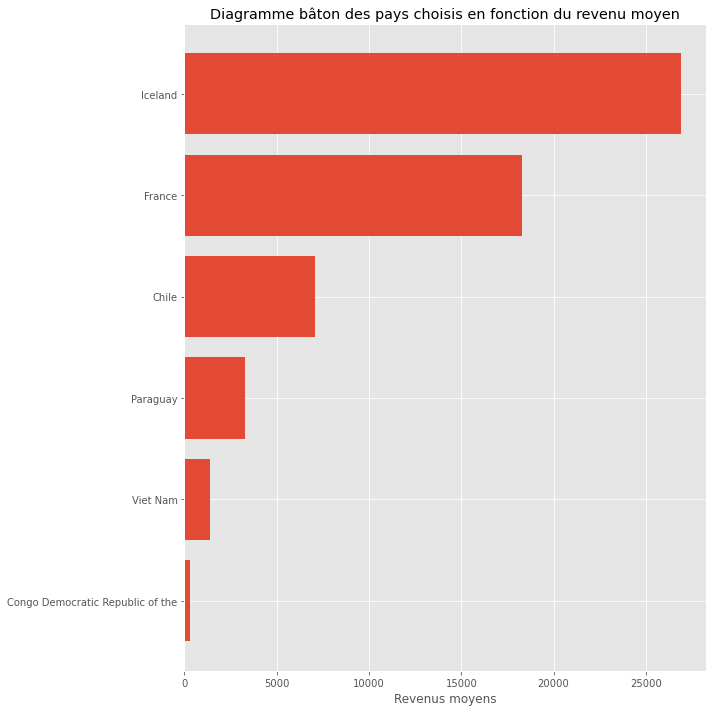

In [13]:
# Paramètres généraux
plt.figure(figsize=(10,10))

# Paramètres graphiques
plt.barh(selected_countries.country, selected_countries.income_avg)

# Métadonnées
plt.title('Diagramme bâton des pays choisis en fonction du revenu moyen')
plt.xlabel('Revenus moyens')
plt.tight_layout() # Permet de ne pas couper les labels

# Sauvegarde
plt.savefig('graph/Diagramme_bâton_pays_revenu_moyen.png')
plt.show()

In [14]:

# Préparation des données par pays choisis
revenu_fra = df[df['country'] == 'France']
revenu_con = df[df['country'] == 'Congo Democratic Republic of the']
revenu_vie = df[df['country'] == 'Viet Nam']
revenu_par = df[df['country'] == 'Paraguay']
revenu_chi = df[df['country'] == 'Chile']
revenu_ice = df[df['country'] == 'Iceland']
revenu_fra.head()

,country,country_code,population,quantile,income,gdpppp,Gini,income_avg
3300,France,FRA,64374979.0,1,2958.3040,30357.0,0.34564,18309.407545
3301,France,FRA,64374979.0,2,4412.6753,30357.0,0.34564,18309.407545
3302,France,FRA,64374979.0,3,4939.6350,30357.0,0.34564,18309.407545
3303,France,FRA,64374979.0,4,5422.9165,30357.0,0.34564,18309.407545
3304,France,FRA,64374979.0,5,5906.5376,30357.0,0.34564,18309.407545


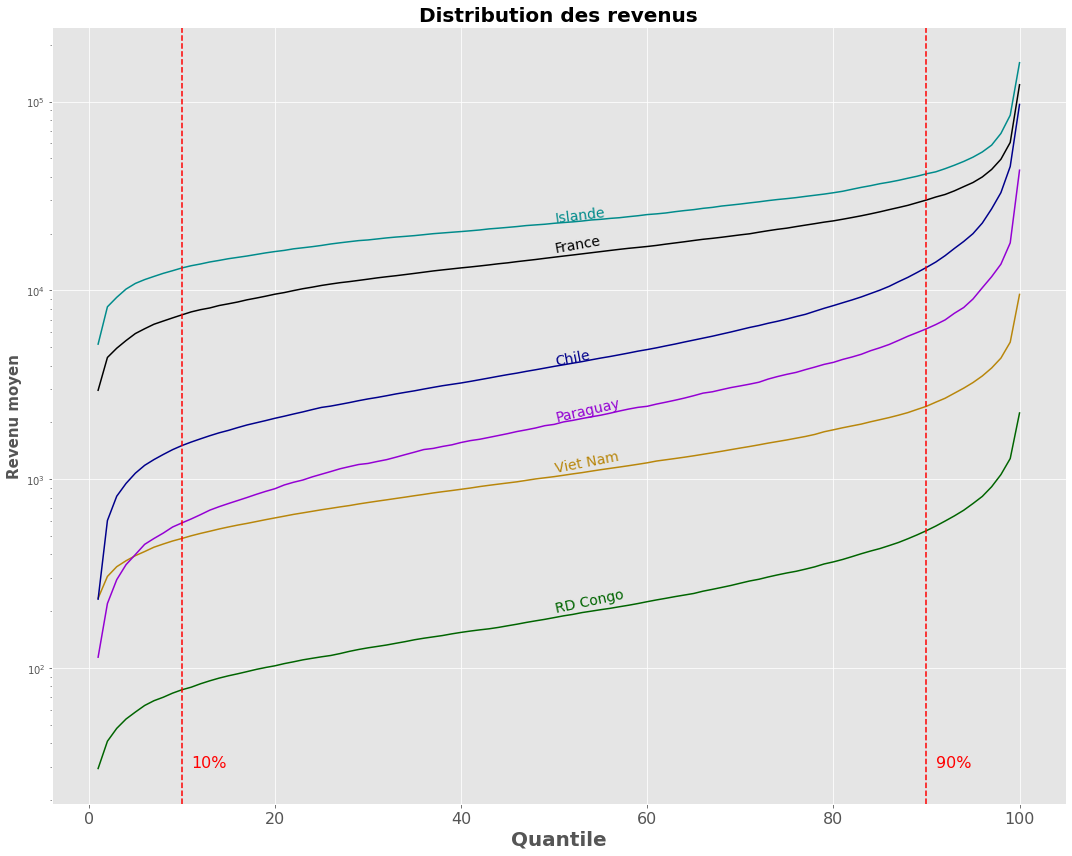

In [15]:
# Création des labels
label = ['France',  'RD Congo (min)', 'Viet Nam (25%)', 'Paraguay (med)', 'Chile (75%)', 'Islande (max)']

# Paramètres généraux
plt.figure(figsize=(15,12))
plt.yscale('log') #Set the y-axis scale.

# Paramètres des courbes
plt.plot(revenu_fra['quantile'], revenu_fra['income'], color='black')
plt.text(50, 16000 , 'France', fontsize = '14', color='black', rotation = 10)


plt.plot(revenu_con['quantile'], revenu_con['income'], color='darkgreen')
plt.text(50, 198 , 'RD Congo', fontsize = '14', color='darkgreen', rotation = 12)

plt.plot(revenu_vie['quantile'], revenu_vie['income'], color='darkgoldenrod')
plt.text(50, 1090 , 'Viet Nam', fontsize = '14', color='darkgoldenrod', rotation = 11)

plt.plot(revenu_par['quantile'], revenu_par['income'], color='darkviolet')
plt.text(50, 2030 , 'Paraguay', fontsize = '14', color='darkviolet', rotation = 13)

plt.plot(revenu_chi['quantile'], revenu_chi['income'], color='darkblue')
plt.text(50, 4000 , 'Chile', fontsize = '14', color='darkblue', rotation = 11)

plt.plot(revenu_ice['quantile'], revenu_ice['income'], color='darkcyan')
plt.text(50, 23100 , 'Islande', fontsize = '14', color='darkcyan', rotation = 7)

# Paramètre des lignes de référence
plt.axvline(10, linestyle='--', color='r')
plt.text(11, 30, '10%', color='r', fontsize=16)
plt.axvline(90, linestyle='--', color='r')
plt.text(91, 30, '90%', color='r', fontsize=16)

# Métadonnées
plt.title("Distribution des revenus", fontsize=20, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=15, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=15, fontweight='bold')
plt.xlabel('Quantile', fontsize=20)
plt.xticks(fontsize=16)
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/representation_revenus.png')
plt.show()


On remarque que la distribution des revenus suit pour chaque pays représenté la même dynamique à des échelles différentes. Pour vérifier l'égalité des répartions de revenus moyens, nous allons tracer les courbes de Lorenz de ces pays.

<a id= 'lorenz' > </a>  
<h2 style='color:#6b21eb'>Représentez la courbe de Lorenz de chacun des pays choisis.</h2>


In [16]:
revenu_fra

,country,country_code,population,quantile,income,gdpppp,Gini,income_avg
3300,France,FRA,64374979.0,1,2958.3040,30357.0,0.34564,18309.407545
3301,France,FRA,64374979.0,2,4412.6753,30357.0,0.34564,18309.407545
3302,France,FRA,64374979.0,3,4939.6350,30357.0,0.34564,18309.407545
3303,France,FRA,64374979.0,4,5422.9165,30357.0,0.34564,18309.407545
3304,France,FRA,64374979.0,5,5906.5376,30357.0,0.34564,18309.407545
...,...,...,...,...,...,...,...,...
3395,France,FRA,64374979.0,96,39873.5100,30357.0,0.34564,18309.407545
3396,France,FRA,64374979.0,97,43693.0350,30357.0,0.34564,18309.407545
3397,France,FRA,64374979.0,98,49489.5820,30357.0,0.34564,18309.407545
3398,France,FRA,64374979.0,99,60758.6130,30357.0,0.34564,18309.407545


In [17]:
# Calculs des données des courbes de Lorenz
#Sélectionne tout d'abord le sous-échantillon de travail que l'on appelle  income

income_fra = revenu_fra['income'].values
income_fra

array([  2958.304 ,   4412.6753,   4939.635 ,   5422.9165,   5906.5376,
         6263.426 ,   6617.146 ,   6879.89  ,   7149.1973,   7419.523 ,
         7692.338 ,   7903.37  ,   8071.4043,   8314.346 ,   8490.188 ,
         8679.722 ,   8913.611 ,   9106.2   ,   9316.214 ,   9547.614 ,
         9736.355 ,   9975.789 ,  10205.606 ,  10400.231 ,  10620.203 ,
        10807.021 ,  10984.673 ,  11129.511 ,  11296.752 ,  11468.634 ,
        11650.472 ,  11810.246 ,  11959.609 ,  12129.455 ,  12303.372 ,
        12486.116 ,  12673.952 ,  12838.025 ,  12995.085 ,  13156.103 ,
        13303.77  ,  13469.087 ,  13641.874 ,  13832.539 ,  13992.651 ,
        14198.4795,  14385.07  ,  14571.889 ,  14782.922 ,  14989.088 ,
        15195.142 ,  15398.14  ,  15609.965 ,  15826.994 ,  16046.401 ,
        16270.334 ,  16493.133 ,  16703.715 ,  16886.91  ,  17080.404 ,
        17306.373 ,  17579.867 ,  17834.238 ,  18094.719 ,  18374.322 ,
        18646.686 ,  18864.96  ,  19117.182 ,  19395.879 ,  1968

In [18]:
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_fra = np.cumsum(np.sort(income_fra)) / income_fra.sum()
lorenz_fra

array([0.00161573, 0.00402579, 0.00672366, 0.00968547, 0.01291143,
       0.01633231, 0.01994638, 0.02370395, 0.02760861, 0.03166091,
       0.03586221, 0.04017878, 0.04458711, 0.04912814, 0.0537652 ,
       0.05850578, 0.0633741 , 0.06834761, 0.07343582, 0.07865042,
       0.0839681 , 0.08941655, 0.09499052, 0.10067078, 0.10647119,
       0.11237363, 0.1183731 , 0.12445168, 0.13062159, 0.13688539,
       0.14324849, 0.14969886, 0.15623081, 0.16285552, 0.16957522,
       0.17639473, 0.18331683, 0.19032854, 0.19742603, 0.20461146,
       0.21187755, 0.21923392, 0.22668467, 0.23423955, 0.24188188,
       0.24963662, 0.25749328, 0.26545197, 0.27352592, 0.28171247,
       0.29001156, 0.29842152, 0.30694717, 0.31559136, 0.32435538,
       0.3332417 , 0.34224971, 0.35137274, 0.36059581, 0.36992457,
       0.37937675, 0.3889783 , 0.39871877, 0.40860152, 0.41863697,
       0.42882118, 0.43912461, 0.44956579, 0.46015918, 0.47090819,
       0.48179929, 0.4929039 , 0.50421308, 0.51571575, 0.52738

In [19]:
lorenz_fra = np.append([0], lorenz_fra)
lorenz_fra


array([0.        , 0.00161573, 0.00402579, 0.00672366, 0.00968547,
       0.01291143, 0.01633231, 0.01994638, 0.02370395, 0.02760861,
       0.03166091, 0.03586221, 0.04017878, 0.04458711, 0.04912814,
       0.0537652 , 0.05850578, 0.0633741 , 0.06834761, 0.07343582,
       0.07865042, 0.0839681 , 0.08941655, 0.09499052, 0.10067078,
       0.10647119, 0.11237363, 0.1183731 , 0.12445168, 0.13062159,
       0.13688539, 0.14324849, 0.14969886, 0.15623081, 0.16285552,
       0.16957522, 0.17639473, 0.18331683, 0.19032854, 0.19742603,
       0.20461146, 0.21187755, 0.21923392, 0.22668467, 0.23423955,
       0.24188188, 0.24963662, 0.25749328, 0.26545197, 0.27352592,
       0.28171247, 0.29001156, 0.29842152, 0.30694717, 0.31559136,
       0.32435538, 0.3332417 , 0.34224971, 0.35137274, 0.36059581,
       0.36992457, 0.37937675, 0.3889783 , 0.39871877, 0.40860152,
       0.41863697, 0.42882118, 0.43912461, 0.44956579, 0.46015918,
       0.47090819, 0.48179929, 0.4929039 , 0.50421308, 0.51571

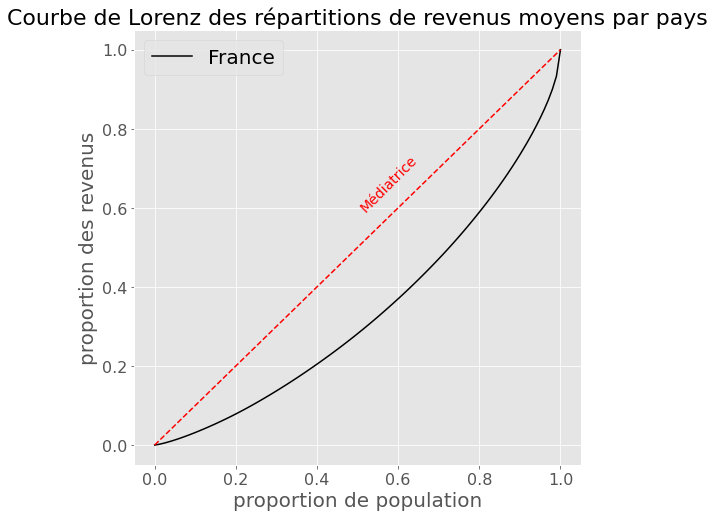

In [20]:

plt.figure(figsize=(8,8))
label = ['France']
plt.plot(np.linspace(0,1,len(lorenz_fra)),lorenz_fra, color='black')
# Métadonnées
plt.title('Courbe de Lorenz des répartitions de revenus moyens par pays', fontsize=22)
plt.ylabel('proportion des revenus', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('proportion de population', fontsize=20)
plt.xticks(fontsize=16)
plt.legend(label, prop={'size':20})

# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Médiatrice')
plt.text(0.5, 0.59, 'Médiatrice', fontsize=14, rotation = 45, color ='red')

plt.show()

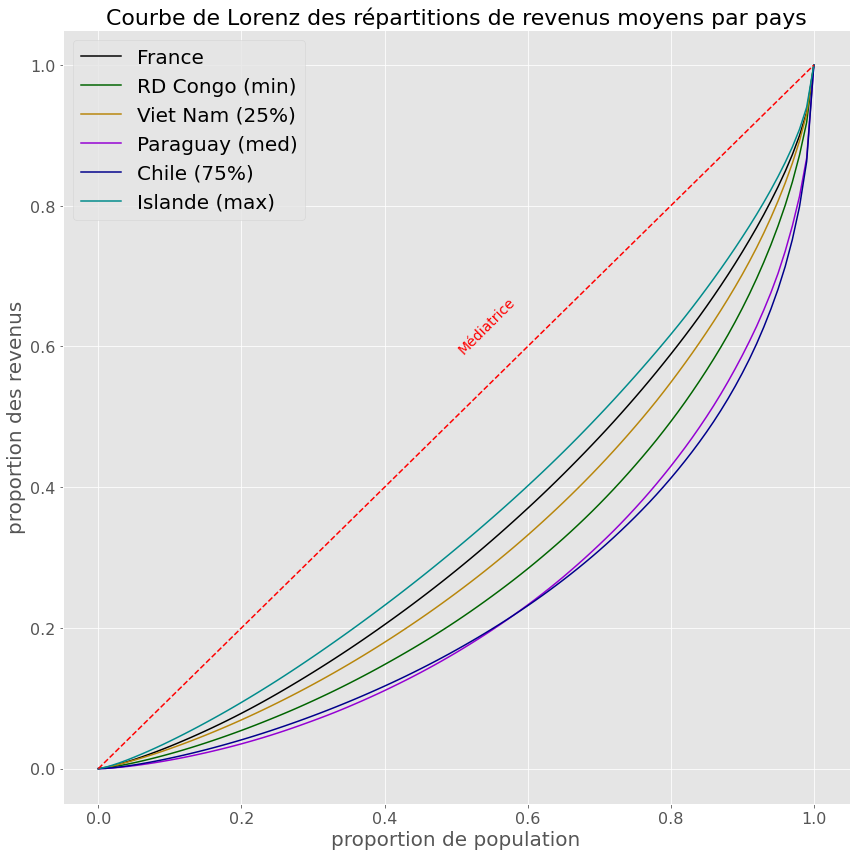

In [21]:
# Calculs des données des courbes de Lorenz
#Sélectionne tout d'abord le sous-échantillon de travail que l'on appelle  income
label = ['France',  'RD Congo (min)', 'Viet Nam (25%)', 'Paraguay (med)', 'Chile (75%)', 'Islande (max)']

income_fra = revenu_fra['income'].values
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_fra = np.cumsum(np.sort(income_fra)) / income_fra.sum()
lorenz_fra = np.append([0], lorenz_fra)

income_con = revenu_con['income'].values
lorenz_con = np.cumsum(np.sort(income_con)) / income_con.sum()
lorenz_con = np.append([0], lorenz_con)

income_vie = revenu_vie['income'].values
lorenz_vie = np.cumsum(np.sort(income_vie)) / income_vie.sum()
lorenz_vie = np.append([0], lorenz_vie)

income_par = revenu_par['income'].values
lorenz_par = np.cumsum(np.sort(income_par)) / income_par.sum()
lorenz_par = np.append([0], lorenz_par)

income_chi = revenu_chi['income'].values
lorenz_chi = np.cumsum(np.sort(income_chi)) / income_chi.sum()
lorenz_chi = np.append([0], lorenz_chi)

income_ice = revenu_ice['income'].values
lorenz_ice = np.cumsum(np.sort(income_ice)) / income_ice.sum()
lorenz_ice = np.append([0], lorenz_ice)

# Paramètres généraux
plt.figure(figsize=(12,12))

# Paramètres des courbes de Lorenz
plt.plot(np.linspace(0,1,len(lorenz_fra)),lorenz_fra, color='black')
plt.plot(np.linspace(0,1,len(lorenz_con)),lorenz_con, color='darkgreen')
plt.plot(np.linspace(0,1,len(lorenz_vie)),lorenz_vie, color='darkgoldenrod')
plt.plot(np.linspace(0,1,len(lorenz_par)),lorenz_par, color='darkviolet')
plt.plot(np.linspace(0,1,len(lorenz_chi)),lorenz_chi, color='darkblue')
plt.plot(np.linspace(0,1,len(lorenz_ice)),lorenz_ice, color='darkcyan')

# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Médiatrice')
plt.text(0.5, 0.59, 'Médiatrice', fontsize=14, rotation = 45, color ='red')

# Métadonnées
plt.title('Courbe de Lorenz des répartitions de revenus moyens par pays', fontsize=22)
plt.ylabel('proportion des revenus', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('proportion de population', fontsize=20)
plt.xticks(fontsize=16)
plt.legend(label, prop={'size':20})
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/Courbe de Lorenz des répartitions de revenus moyens par pays.png')
plt.show()

<a id='evol'></a>
<h2 style='color:#8677b2'>Evolution des indices de Gini</h2>

[Haut de page](#sommaire)

In [22]:

# Chargement du fichier
gini_brut = pd.read_csv('data/gini.csv', skiprows=3, skipinitialspace=True, index_col=1)

# Mise en forme des données
gini_brut.reset_index(inplace=True)
gini_brut.rename(columns={'Country Name': 'Pays'}, inplace =True)
gini_brut.drop(columns=['Country Code',
                      'Indicator Name',
                      'Indicator Code',
                       'Unnamed: 63'], inplace = True)
gini_brut.set_index('Pays', inplace=True)
gini_brut = gini_brut.transform(lambda x: x / 100)

gini_brut

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Pays,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN
Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318,0.333,0.278,0.29,0.263,0.273,0.265,0.267,0.29,NaN
"Yémen, Rép. du",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.367,NaN,NaN,NaN,NaN
Afrique du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.634,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN


<div class="alert alert-info" role="alert">
<p >
    Les données ont été téléchargées sur le site de la banque mondiale<br/>
    <a href="https://donnees.banquemondiale.org/indicateur/si.pov.gini?view=map">Source</a><br/>
    data > Dimension: Inequality > Inequality: Income inequality, Gini coefficient<br/>
</p>
</div>

In [23]:
# Données disponibles pour la France
gini_fra = gini_brut.loc[gini_brut.index == 'France'].dropna(axis=1)
gini_fra

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Pays,,,,,,,,,,,,,
France,0.314,0.306,0.298,0.297,0.324,0.33,0.327,0.337,0.333,0.331,0.325,0.323,0.327


In [24]:
# Données disponibles pour la République démocratique du Congo
gini_con = gini_brut.loc[gini_brut.index == 'Congo, République démocratique du'].iloc[0:].dropna(axis=1)
gini_con

,2004,2012
Pays,,
"Congo, République démocratique du",0.422,0.421


In [25]:
# Données disponibles pour le Viet Nam
gini_vie = gini_brut.loc[gini_brut.index == 'Viet Nam'].iloc[0:].dropna(axis=1)
gini_vie

,1992,1998,2002,2004,2006,2008,2010,2012,2014,2016
Pays,,,,,,,,,,
Viet Nam,0.357,0.354,0.37,0.368,0.358,0.356,0.393,0.356,0.348,0.353


In [26]:
# Données disponibles pour le Paraguay
gini_par = gini_brut.loc[gini_brut.index == 'Paraguay'].iloc[0:].dropna(axis=1)
gini_par

,1990,1995,1997,1999,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Pays,,,,,,,,,,,,,,,,,,,,,
Paraguay,0.408,0.582,0.549,0.546,0.546,0.573,0.549,0.523,0.514,0.53,...,0.507,0.491,0.51,0.523,0.476,0.479,0.507,0.476,0.479,0.488


In [27]:
# Données disponibles pour le Chili
gini_chi = gini_brut.loc[gini_brut.index == 'Chili'].iloc[0:].dropna(axis=1)
gini_chi

,1987,1990,1992,1994,1996,1998,2000,2003,2006,2009,2011,2013,2015,2017
Pays,,,,,,,,,,,,,,
Chili,0.562,0.572,0.548,0.564,0.549,0.555,0.528,0.515,0.482,0.49,0.476,0.473,0.477,0.466


In [28]:
# Données disponibles pour l'Islande
gini_ice = gini_brut.loc[gini_brut.index == 'Islande'].iloc[0:].dropna(axis=1)
gini_ice

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Pays,,,,,,,,,,,,
Islande,0.268,0.28,0.29,0.302,0.295,0.318,0.287,0.262,0.268,0.268,0.254,0.278


In [29]:
# Restriction des données sur les pays concernés
gini = gini_brut.loc[(gini_brut.index == 'France') |
                    (gini_brut.index == 'Congo, République démocratique du') |
                    (gini_brut.index == 'Viet Nam') |
                    (gini_brut.index == 'Paraguay') |
                     (gini_brut.index == 'Chili' )|
                    (gini_brut.index =='Islande')].T

# Nommage de l'index
gini.index.name = 'year'

gini

Pays,Chili,"Congo, République démocratique du",France,Islande,Paraguay,Viet Nam
year,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN


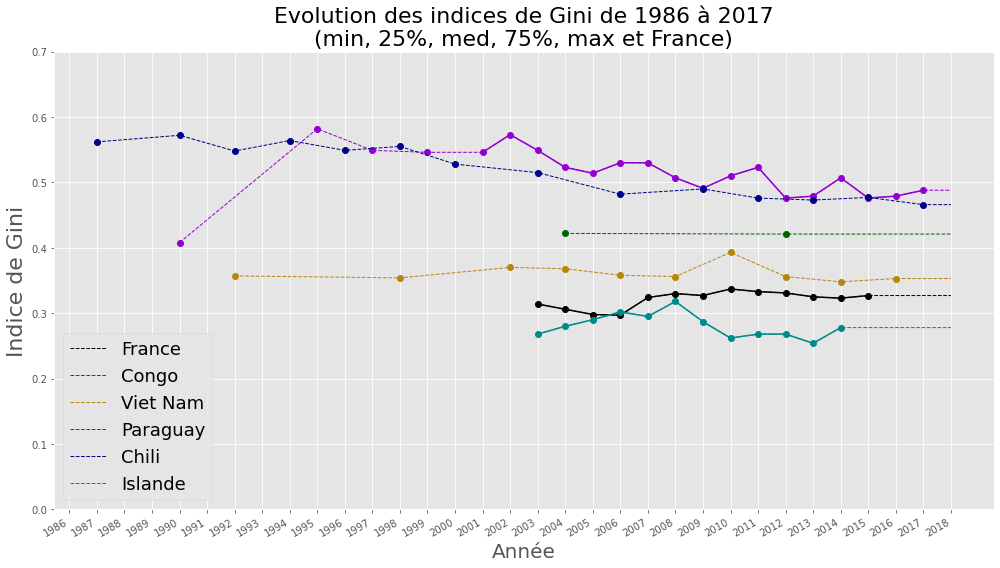

In [30]:
# Paramètre généraux
fig, ax = plt.subplots(figsize=(14,8))

# Paramètres des courbes
line, = ax.plot(gini['France'].interpolate(method='linear'),
                ls = '--', lw = 1, color='Black', label='France')
ax.plot(gini['France'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Congo, République démocratique du'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgreen', label='Congo')
ax.plot(gini['Congo, République démocratique du'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Viet Nam'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgoldenrod', label='Viet Nam')
ax.plot(gini['Viet Nam'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Paraguay'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkviolet', label='Paraguay')
ax.plot(gini['Paraguay'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Chili'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkblue', label='Chili')
ax.plot(gini['Chili'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Islande'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkcyan', label='Islande')
ax.plot(gini['Islande'], color=line.get_color(), lw=1.5, marker = 'o')



# Métadonnées
plt.title('Evolution des indices de Gini de 1986 à 2017\n(min, 25%, med, 75%, max et France)', fontsize=22)
plt.xlabel('Année', fontsize=20)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('Indice de Gini', fontsize = 22)
plt.ylim(0,0.7)
plt.legend(fontsize=18)
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/evolution_gini.png')
plt.show()



Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

<a id='classement'></a>
<h2 style='color:#8677b2'>Classement par indice de Gini</h2>

[Haut de page](#sommaire)

In [31]:
# Classement selon l'indice de Gini
df_Gini = df.groupby(by='country').mean()
df_Gini


,population,quantile,income,gdpppp,Gini,income_avg
country,,,,,,
Albania,2947314.0,50.5,2994.829902,7297.0,0.321410,2994.829902
Argentina,40080159.0,50.5,5847.884654,13220.0,0.465249,5847.884654
Armenia,2907615.0,50.5,1628.382785,5611.0,0.280305,1628.382785
Austria,8321496.0,50.5,16637.600204,36193.0,0.295326,16637.600204
Azerbaijan,8763400.0,50.5,2357.429023,8101.0,0.329031,2357.429023
...,...,...,...,...,...,...
United States of America,304093966.0,50.5,25503.581661,43261.0,0.447326,25503.581661
Uruguay,3340221.0,50.5,5290.784920,11682.0,0.475060,5290.784920
Venezuela (Bolivarian Republic of),27635827.0,50.5,3167.147724,11756.0,0.449526,3167.147724


In [32]:
pays_gini = df_Gini.sort_values(by='Gini', ascending=False)
pays_gini.reset_index(inplace=True)

# Les 5 pays avec le plus haut indice de Gini
max_cinq_gini_pays = pays_gini.head()
min_cinq_gini_pays =pays_gini.tail()


In [33]:
max_cinq_gini_pays

,country,population,quantile,income,gdpppp,Gini,income_avg
0,South Africa,49779472.0,50.5,5617.904880,9602.0,0.682949,5617.904880
1,Honduras,7980955.0,50.5,3296.268419,3628.0,0.615512,3296.268419
2,Colombia,44254972.0,50.5,3547.005276,8185.0,0.583437,3547.005276
3,Guatemala,13739299.0,50.5,2142.474753,4367.0,0.582468,2142.474753
4,Central African Republic,4273368.0,50.5,811.299901,685.0,0.575972,811.299901


In [34]:
min_cinq_gini_pays

,country,population,quantile,income,gdpppp,Gini,income_avg
111,Ukraine,46258189.0,50.5,3349.388306,6721.0,0.272415,3349.388306
112,Sweden,9219637.0,50.5,16184.222707,34371.0,0.272166,16184.222707
113,Czech Republic,10384603.0,50.5,8235.293411,23223.0,0.270162,8235.293411
114,Slovakia,5379233.0,50.5,6096.579894,20515.0,0.264573,6096.579894
115,Slovenia,2021316.0,50.5,12106.007475,27197.0,0.248249,12106.007475


In [35]:
# Position de la France (77 ème)
pays_gini.loc[pays_gini['country'] == 'France']

,country,population,quantile,income,gdpppp,Gini,income_avg
76,France,64374979.0,50.5,18309.407545,30357.0,0.34564,18309.407545


In [36]:
df.head()

,country,country_code,population,quantile,income,gdpppp,Gini,income_avg
0,Albania,ALB,2947314.0,1,728.89795,7297.0,0.32141,2994.829902
1,Albania,ALB,2947314.0,2,916.66235,7297.0,0.32141,2994.829902
2,Albania,ALB,2947314.0,3,1010.91600,7297.0,0.32141,2994.829902
3,Albania,ALB,2947314.0,4,1086.90780,7297.0,0.32141,2994.829902
4,Albania,ALB,2947314.0,5,1132.69970,7297.0,0.32141,2994.829902


In [37]:
# Enregistrement du fichier
df.to_csv('analyse1.csv', index=False)

[Haut de page](#sommaire)